# Classification using Machine Learning

In [1]:
#library import

import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import pandas as pd
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

In [2]:
#Set working directory to current directory. Please ensure that Xtrain, Ytrain and Xtest files are in current working directory
import os
cwd = os.getcwd()
cwd

'C:\\Users\\brand\\Documents\\Masters\\Warwick\\CS909 Data Mining\\Assignment 1\\Final Submit'

# Question No. 1: (Showing data)

## i. How many training and test examples are there? You can use np.loadtxt for this purpose. Show at least 10 randomly selected objects of each class using plt.matshow.

In [3]:
#Load XTrain File
trainfile= 'Xtrain.csv'
Xtrain = np.loadtxt(trainfile, delimiter=' ')

#Load XTest File
testfile= 'Xtest.csv'
Xtest = np.loadtxt(testfile, delimiter=' ')

#Load YTrain File
ytrainfile= 'Ytrain.csv'
Ytrain = np.loadtxt(ytrainfile, delimiter=' ')

In [4]:
print('No of training examples: ', Xtrain.shape[0])
print('No of test examples: ', Xtest.shape[0])

No of training examples:  3000
No of test examples:  3000


In [5]:
#Function for randomly selecting and displaying 10 objects from the same class
def randomize_and_display_class (y,x, no_objects = 10, datasetName=''):
    #shuffle the dataset
    random.shuffle(y)
    random_idx = y[:no_objects]
    
    for i in range(len(random_idx)):
        #plot current image
        plt.matshow(x[random_idx[i]].reshape((28,-1)))
        plt.title('Image '+str(random_idx[i])+' from '+datasetName)

In [6]:
#Populate negative and positve classes index
negative_examples_idx = np.where(Ytrain == -1)[0]
positive_examples_idx = np.where(Ytrain == 1)[0]

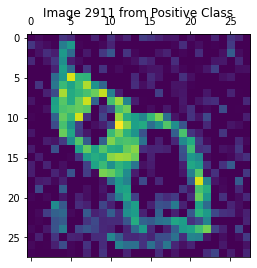

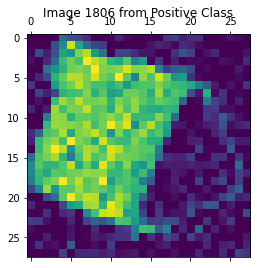

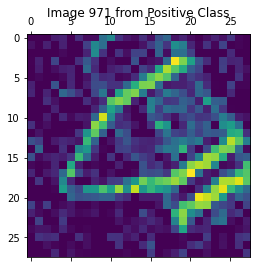

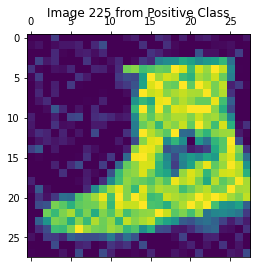

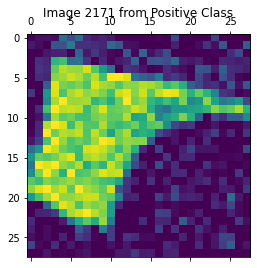

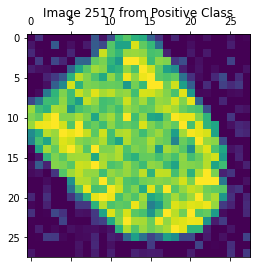

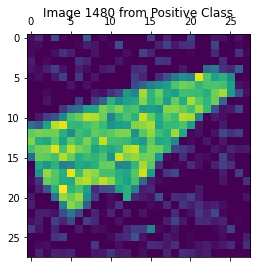

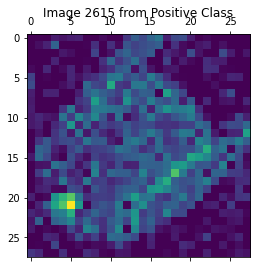

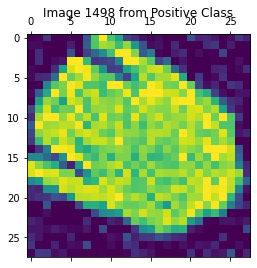

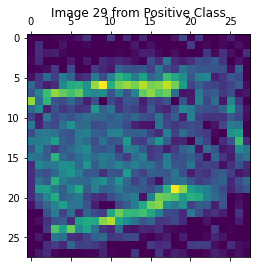

In [7]:
#Display 10 images for the +1 class
randomize_and_display_class(positive_examples_idx,Xtrain,10,'Positive Class' )

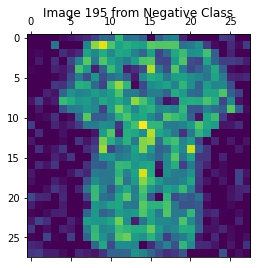

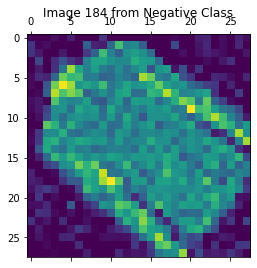

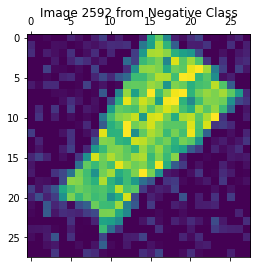

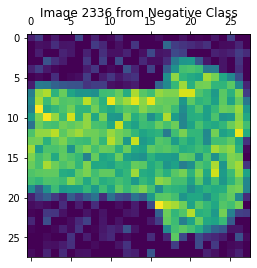

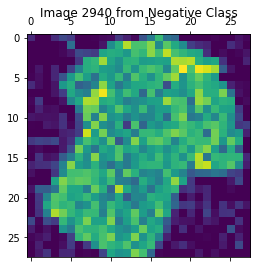

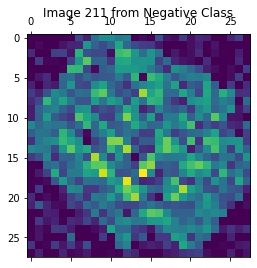

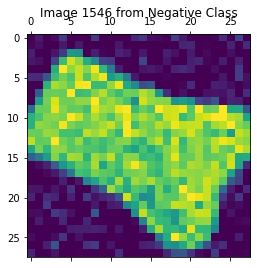

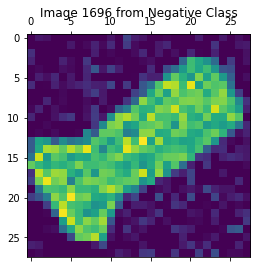

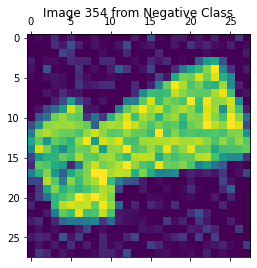

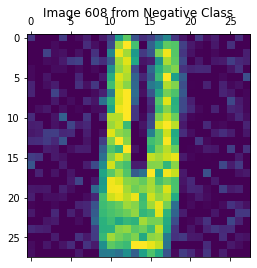

In [8]:
#Display 10 images for the -1 class
randomize_and_display_class(negative_examples_idx,Xtrain,10,'Negative Class' )

### ii. How many positive and negative examples are there in the training dataset?

In [9]:
positive_examples_count = (Ytrain == 1).sum()
negative_examples_count = (Ytrain == -1).sum()

print('No of Positive Examples in the Training Dataset: ', positive_examples_count)
print('No of Negative Examples in the Training Dataset: ', negative_examples_count)

No of Positive Examples in the Training Dataset:  1824
No of Negative Examples in the Training Dataset:  1176


### iii. Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your reasoning.

The dataset suffers from a slight inbalance that is 39.2% belonging to the negative class and 60.8% belonging to the positive class.

Accuracy is suitable when the classes in the dataset are equally distributed and when the model threshold is optimal. Since this is not the case in the above dataset, the impact of the least representanted classes (negative classes) will not be as significant as the majority (positive) classes and hence, if a significant amount of misclassifications are computed on the minority class, this will not be entirely reflected in the final accuracy score.

The AUC-ROC is a popular is a popular tool for both balanced and slightly imbalanced datasets. AUC-ROC is not based on the assumption that the classification threshold is optimal (unlike accuracy) but assumes that the dataset is balanced (not severly imbalanced) and that misclassification of any class is equally bad.

In AUC-PR, both precision and recall focus on the positive minority classes and are not concernced by the True Negatives in their calculation. The AUC-PR make it possible to assess the classifier's performance on minority classes and are more adapted in situtation where the dataset is highly skewed and when predicting the positive class correctly is more important than predicting the negative class. Popular application for AUC-PR are in spam email detection or cancer detection, where the positive class can make up only a minority (of say 1%) of the entire dataset and where predicting the minority class correctly is more important than the majority class. 

It is assumed that misclassifying the +1 or -1 classes in our dataset in equally bad. If the dataset was severly imbalanced and if predicting the minority class correctly was more important and critical than predicting accurately both classes, the AUC-PR would have been a good choice.

However, since the dataset in our case is slightly imbalanced and since both the positive and negative classes performance is equally important, the **AUC-ROC** should be used in this case. 

### iv. What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate why this would be the case.

In [10]:
#Calculating the accuracy using a DummyClassifier
model = DummyClassifier(strategy='stratified')
model.fit(Xtrain, Ytrain)

yhat = model.predict_proba(Xtrain)
pos_probs = yhat[:, 1]

#calculate accuracy
acc = accuracy_score(Ytrain, model.predict(Xtrain))
print('Random Classifier Accuracy Score: %.3f' % acc)


Random Classifier Accuracy Score: 0.540


$$ Accuracy = [P(class = -1) * P(prediction = -1)] + [P(class = 1) * P(prediction = 1)]
 = (0.392 * 0.392) + (0.608 * 0.608)  
 = 0.523 = \textbf{52.3%} $$

Mathematically, a random classifier would return a **52.3%** accuracy. This result is also proved by the code above using a Dummy Classifier. An accuracy higher than 50% is achieved due to the class imbalance in the dataset.

### v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate why this would be the case.
Area under the ROC curve is insensitive to class balance. Area under the PR curve, on the other hand, is highly influenced by this.

### AUC-ROC

The **AUC-ROC** does not have a bias toward the minority or majority classes. Regardless of the class distribution, the AUC-ROC of a random classifier will be **50%**, as demonstrated in the code and calculation below. The area under the ROC curve is also 0.5. This occurs given that there is a 50% probability of obtain any of the +1 or -1 classes. Hence, the False Positive and True Positive Rates will be equal.


For binary classification random classifier:


$$ AUC-ROC = TPR = \frac{912}{912+912} = FPR = \frac{588}{588+588} = 0.5 = \textbf{50%} $$
         
         
where <br>
TPR = True Positive Rate <br>
FPR = False Positive Rate<br>
912 = half of the positive (+1) classes = TP = FN<br>
588 = half of the negative (-1) classes = FP = TN


In [11]:
# Verifying the random classifier ROC Score by code
roc_auc = roc_auc_score(Ytrain, pos_probs)
print('Random Classifier ROC-AUC %.3f' % roc_auc)


Random Classifier ROC-AUC 0.493


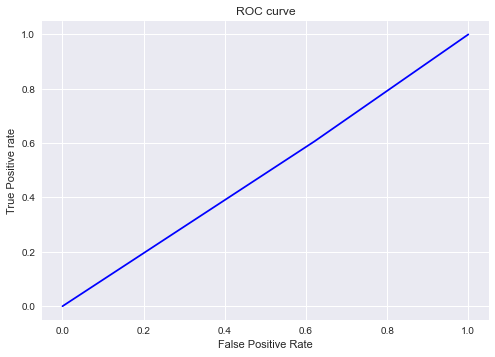

In [12]:
#Plotting TPR vs FPR. Graph shows that Area Under Curve for a random classifier = 0.5
fpr, tpr, thresh = roc_curve(Ytrain, pos_probs, pos_label=1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr, tpr,color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

### AUC-PR

The **AUC-PR** for a random classifier would simply be the Precision (a flat line on the PR curve) which is proportional to the number of positive examples in our dataset. This metric minimises the False Positives over the positive class which generally is the minority class in the dataset. Hence, it would be useful to flip the (-1) and (+1) class labels since the -1 label is the minority class. The AUC-PR for a random classifier will be the probability of predicting the positive (-1) class which is equal to **39.2%**. 

$$ AUC-PR = Precision = \frac{588}{588+912} =  0.392 = \textbf{39.2%}$$
         
Note: In this assignment, within the evaluation_metrics functions below, the +1 and -1 labels will be flipped when doing performance evaluation. This will be done solely because of PR which is generally used to minimise the precision error over the minority class, which was -1 in the original Ytrain dataset. This change has no effect on the accuracy and AUR-ROC calculations.

In [13]:
# Verifying the random classifier AUC-PR Score by code
average_precision = average_precision_score(Ytrain, pos_probs, pos_label = -1)
print('Random Classifier PR score: {0:0.3f}'.format(average_precision))

Random Classifier PR score: 0.395


Text(0.5, 1.0, 'AUC-PR')

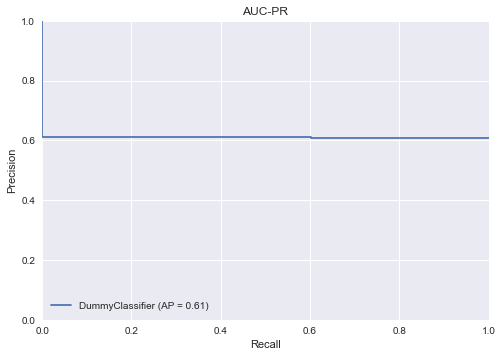

In [14]:
#Plotting AUC-PR curve Graph shows that Area Under Curve for a random classifier = 0.608
fig, ax1 = plt.subplots()
plot_precision_recall_curve(model, Xtrain, Ytrain, ax=ax1)#, pos_label=mclasses_[1])
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_title("AUC-PR")

**** **End of Question No.1 ** ****

# Question No. 2: (Nearest Neighbor Classifier) [5 Marks]

## i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results.

In [15]:
#5-fold stratified k-fold cross validation with data shuffle enabled
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#enumarate starting stratified fold
fold = 1

#store accuracy, auc-roc, auc-pr in arrays
accuracy_arr = []
auc_roc_arr = []
auc_pr_arr = []

#flip +1 and -1 labels so that +1 (minority class) is the positive class for PR
#This has no effect on accuracy or AUC-ROC
Ytrain_flip = np.where(Ytrain == -1, 1., -1.)
    
for train_index, validation_index in skfolds.split(Xtrain, Ytrain_flip):
    
    X_train_fold = Xtrain[train_index]
    y_train_fold = Ytrain_flip[train_index]
    X_validation_fold = Xtrain[validation_index]
    y_validation_fold = Ytrain_flip[validation_index]

    sknn = KNeighborsClassifier(n_neighbors=1)
    sknn.fit(X_train_fold,y_train_fold)
    Y_pred_fold = sknn.predict(X_validation_fold)
    
    #Accuracy
    accuracy_fold = accuracy_score(Y_pred_fold, y_validation_fold)
    
    #ROC
    y_scores = sknn.predict_proba(X_validation_fold)[:,1] #positive classes prediction score
    fpr, tpr, threshold = roc_curve(y_validation_fold, y_scores) #pos_label set to 1 by default, neg_label = -1
    roc = auc(fpr, tpr)
    
    #PR   
    #average_precision_score and auc methods return similar results. However, the latter uses a trapezoidal approximation 
    #    and the former is more accuracte given that its not an interpolated result.
    # pos_label set to 1 by default 
    pr_auc = average_precision_score(y_validation_fold, y_scores)
    
    accuracy_arr.append(accuracy_fold)
    auc_roc_arr.append(roc)
    auc_pr_arr.append(pr_auc)
    
    print('Fold: ', fold,', Accuracy: ', accuracy_fold,', AUC-ROC: ', roc,', AUC-PR: ', pr_auc)
        
    fold+=1

Fold:  1 , Accuracy:  0.82 , AUC-ROC:  0.812162413857329 , AUC-PR:  0.6845625029672886
Fold:  2 , Accuracy:  0.845 , AUC-ROC:  0.8430486738560184 , AUC-PR:  0.7188893617021277
Fold:  3 , Accuracy:  0.8266666666666667 , AUC-ROC:  0.8264645875837947 , AUC-PR:  0.6914975025526395
Fold:  4 , Accuracy:  0.8066666666666666 , AUC-ROC:  0.8001748761294083 , AUC-PR:  0.6636975746432011
Fold:  5 , Accuracy:  0.82 , AUC-ROC:  0.817196152725153 , AUC-PR:  0.6822613093724393


### ii. What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR)across all the folds for this classifier? Show code to demonstrate the results.

In [16]:
#Accuracy Mean and Standard Deviation
accuracy_mean = np.mean(accuracy_arr)
accuracy_standard_deviation = np.std(accuracy_arr)

#AUC-ROC Mean and Standard Deviation
auc_roc_mean = np.mean(auc_roc_arr)
auc_roc_standard_deviation = np.std(auc_roc_arr)

#AUC-PR Mean and Standard Deviation
auc_pr_mean = np.mean(auc_pr_arr)
auc_pr_standard_deviation = np.std(auc_pr_arr)

print('Accuracy - Mean: ', accuracy_mean, ', Standard Deviation: ',accuracy_standard_deviation)
print('AUC-ROC - Mean: ', auc_roc_mean, ', Standard Deviation: ',auc_roc_standard_deviation)
print('AUC-PR - Mean: ', auc_pr_mean, ', Standard Deviation: ',auc_pr_standard_deviation)

Accuracy - Mean:  0.8236666666666667 , Standard Deviation:  0.012489995996796798
AUC-ROC - Mean:  0.8198093408303407 , Standard Deviation:  0.01438871333457961
AUC-PR - Mean:  0.6881816502475393 , Standard Deviation:  0.017897357573675346


### iii. What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) on the cross-validation performance? Show code to demonstrate the results.

Three proprocessings techniques were tested in this section:
1. Standardise dataset (using StandardScaler preprocessing to remove the mean and scale to unit variance)
2. Scale dataset between 0-1 (using MinMaxScaler preprocessing)
3. Quantile transformation (using QuantileTransformer preprocessing to map the data to a uniform distribution)
4. Normalise dataset (using normalize preprocessing to achieve unit norm)

The performance metrics for the raw untransformed training dataset were used as reference. 

In summary, preprocessings techniques 1,2 and 3 from the above list lead to a lower performance score for all metrics. However, **normalization** leads to a significant increase in all performance accuracy scores and a decrease in their standard deviation which is desirable.

In [17]:
#Create function to evaluate the impact of preprocessing on the CV performance.
#Function returns average and standard deviation of the 3 performance metrics used

def evaluation_metrics(xtrain_ip, ytrain_ip):
    
    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold = 1
    accuracy_arr = []
    auc_roc_arr = []
    auc_pr_arr = []
    
    ytrain_ip_flip = np.where(ytrain_ip == -1, 1., -1.)
    
    for train_index, validation_index in skfolds.split(xtrain_ip, ytrain_ip_flip):

        X_train_fold = xtrain_ip[train_index]
        y_train_fold = ytrain_ip_flip[train_index]
        X_validation_fold = xtrain_ip[validation_index]
        y_validation_fold = ytrain_ip_flip[validation_index]

        sknn = KNeighborsClassifier(n_neighbors=1)
        sknn.fit(X_train_fold,y_train_fold)
        Y_pred_fold = sknn.predict(X_validation_fold)

        #Accuracy
        accuracy_fold = accuracy_score(Y_pred_fold, y_validation_fold)
        
        #ROC
        y_scores = sknn.predict_proba(X_validation_fold)[:,1] 
        fpr, tpr, threshold = roc_curve(y_validation_fold, y_scores) 
        roc = auc(fpr, tpr)
    
        #PR 
        pr_auc = average_precision_score(y_validation_fold, y_scores)  
    
        accuracy_arr.append(accuracy_fold)
        auc_roc_arr.append(roc)
        auc_pr_arr.append(pr_auc)
        
        fold+=1
        
    #Accuracy Mean and Standard Deviation
    accuracy_mean = np.mean(accuracy_arr)
    accuracy_standard_deviation = np.std(accuracy_arr)

    #AUC-ROC Mean and Standard Deviation
    auc_roc_mean = np.mean(auc_roc_arr)
    auc_roc_standard_deviation = np.std(auc_roc_arr)

    #AUC-PR Mean and Standard Deviation
    auc_pr_mean = np.mean(auc_pr_arr)
    auc_pr_standard_deviation = np.std(auc_pr_arr)

    print('Accuracy - Mean: ', accuracy_mean, ', Standard Deviation: ',accuracy_standard_deviation)
    print('AUC-ROC - Mean: ', auc_roc_mean, ', Standard Deviation: ',auc_roc_standard_deviation)
    print('AUC-PR - Mean: ', auc_pr_mean, ', Standard Deviation: ',auc_pr_standard_deviation)

In [18]:
#Raw dataset performance metrics for reference
evaluation_metrics(Xtrain, Ytrain)

Accuracy - Mean:  0.8236666666666667 , Standard Deviation:  0.012489995996796798
AUC-ROC - Mean:  0.8198093408303407 , Standard Deviation:  0.01438871333457961
AUC-PR - Mean:  0.6881816502475393 , Standard Deviation:  0.017897357573675346


Standard Scaling the data leads to a lower score for all metrics and an increase in standard deviation


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)

evaluation_metrics(X_train_scaled, Ytrain)

Accuracy - Mean:  0.8186666666666668 , Standard Deviation:  0.014118545723031561
AUC-ROC - Mean:  0.8158549173040675 , Standard Deviation:  0.014900285391731086
AUC-PR - Mean:  0.6810988465042414 , Standard Deviation:  0.020061055559368417


Scaling the data between 0 and 1 leads to similar means for all metrics but lower standard deviations for AUC-ROC and accuracy which is desirable 


In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xtrain)

evaluation_metrics(X_train_minmax, Ytrain)

Accuracy - Mean:  0.8236666666666667 , Standard Deviation:  0.011323525167642014
AUC-ROC - Mean:  0.8196628930648264 , Standard Deviation:  0.014319477638452066
AUC-PR - Mean:  0.6881486283228898 , Standard Deviation:  0.016020841098518396


Transforming the features to follow a uniform distribution leads to a lower scores for all metrics which is undesirable.

In [21]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(Xtrain)

evaluation_metrics(X_train_trans, Ytrain)

Accuracy - Mean:  0.8176666666666665 , Standard Deviation:  0.01635033129124095
AUC-ROC - Mean:  0.8151684714960975 , Standard Deviation:  0.015532888852662107
AUC-PR - Mean:  0.6798483320828064 , Standard Deviation:  0.02366017226959862


Scaling the input features to their unit norm leads to a significant increase in all metric scores and a decrease in standard deviation which is desirable

In [22]:
X_train_normalized = preprocessing.normalize(Xtrain, norm='l2')

evaluation_metrics(X_train_normalized, Ytrain)

Accuracy - Mean:  0.8486666666666667 , Standard Deviation:  0.010022197585581944
AUC-ROC - Mean:  0.838228714732106 , Standard Deviation:  0.012040192546167738
AUC-PR - Mean:  0.7284079290292682 , Standard Deviation:  0.015490568223592138


### iv. Use 5-fold cross-validation over training data to calculate the optimal value of k for the k-Nearest neighbour classifier. What is the optimal value of k and what are the cross-validation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results.

Function evaluation_metrics_optimalk was used to iterate over the number of k-neareast neighbour paramters passed and perform 5-fold stratified cross-validation over the training dataset.

The function was evaluated against the following datasets:
- Raw training dataset
- Normalised dataset (using normalize preprocessing)
- Standardised dataset (using StandardScaler preprocessing)
- Scaled dataset between 0-1 (using MinMaxScaler preprocessing)

The optimal value of k was determined by the preprocessing technique and k-value that return the highest AUC-ROC mean and lowest AUC-ROC standard deviation. For code efficiency, only the optimal preprocessing and sub k-values used are shown below. Please refer to Appendix Section A below for code and results using the perprocessing techniques that did not return optimal scores.

The optimal value of **k is 10** using preprocessing technique: **StandardScaler()**. The following metric are obtained by averaging over each fold value:

- Accuracy - Mean:  0.823 , Standard Deviation:  0.008

- **AUC-ROC - Mean:  0.911 , Standard Deviation:  0.006 **

- AUC-PR - Mean:  0.86 , Standard Deviation:  0.009

In [23]:
def evaluation_metrics_optimalk(xtrain_ip, ytrain_ip,neighbours):
    
    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for k_value in neighbours:
        
        fold = 1
        accuracy_arr = []
        auc_roc_arr = []
        auc_pr_arr = []
        
        ytrain_ip_flip = np.where(ytrain_ip == -1, 1., -1.)
    
        for train_index, validation_index in skfolds.split(xtrain_ip, ytrain_ip_flip):

            X_train_fold = xtrain_ip[train_index]
            y_train_fold = ytrain_ip_flip[train_index]
            X_validation_fold = xtrain_ip[validation_index]
            y_validation_fold = ytrain_ip_flip[validation_index]

            sknn = KNeighborsClassifier(n_neighbors=k_value)
            sknn.fit(X_train_fold,y_train_fold)
            Y_pred_fold = sknn.predict(X_validation_fold)

            #Accuracy
            accuracy_fold = accuracy_score(Y_pred_fold, y_validation_fold)

            #ROC
            y_scores = sknn.predict_proba(X_validation_fold)[:,1] 
            fpr, tpr, threshold = roc_curve(y_validation_fold, y_scores) 
            roc = auc(fpr, tpr)

            #PR    
            pr_auc = average_precision_score(y_validation_fold, y_scores)  
    
            accuracy_arr.append(accuracy_fold)
            auc_roc_arr.append(roc)
            auc_pr_arr.append(pr_auc)

            fold+=1

        #Accuracy Mean and Standard Deviation
        accuracy_mean = np.mean(accuracy_arr)
        accuracy_standard_deviation = np.std(accuracy_arr)

        #AUC-ROC Mean and Standard Deviation
        auc_roc_mean = np.mean(auc_roc_arr)
        auc_roc_standard_deviation = np.std(auc_roc_arr)

        #AUC-PR Mean and Standard Deviation
        auc_pr_mean = np.mean(auc_pr_arr)
        auc_pr_standard_deviation = np.std(auc_pr_arr)

        print('k-value: ', k_value)

        print('Accuracy. Mean: ', round(accuracy_mean,3), ', Standard Deviation: ',round(accuracy_standard_deviation,3))
        print('AUC-ROC. Mean: ', round(auc_roc_mean,3), ', Standard Deviation: ',round(auc_roc_standard_deviation,3))
        print('AUC-PR. Mean: ', round(auc_pr_mean,3), ', Standard Deviation: ',round(auc_pr_standard_deviation,3))
        print('*******')

In [24]:
#Standardised training set 
n_neighbors = range(3,15,1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)

evaluation_metrics_optimalk(X_train_scaled, Ytrain, n_neighbors)

k-value:  3
Accuracy. Mean:  0.834 , Standard Deviation:  0.018
AUC-ROC. Mean:  0.89 , Standard Deviation:  0.011
AUC-PR. Mean:  0.808 , Standard Deviation:  0.02
*******
k-value:  4
Accuracy. Mean:  0.841 , Standard Deviation:  0.015
AUC-ROC. Mean:  0.896 , Standard Deviation:  0.01
AUC-PR. Mean:  0.823 , Standard Deviation:  0.018
*******
k-value:  5
Accuracy. Mean:  0.836 , Standard Deviation:  0.01
AUC-ROC. Mean:  0.903 , Standard Deviation:  0.009
AUC-PR. Mean:  0.837 , Standard Deviation:  0.016
*******
k-value:  6
Accuracy. Mean:  0.84 , Standard Deviation:  0.012
AUC-ROC. Mean:  0.906 , Standard Deviation:  0.009
AUC-PR. Mean:  0.846 , Standard Deviation:  0.016
*******
k-value:  7
Accuracy. Mean:  0.836 , Standard Deviation:  0.013
AUC-ROC. Mean:  0.906 , Standard Deviation:  0.009
AUC-PR. Mean:  0.848 , Standard Deviation:  0.016
*******
k-value:  8
Accuracy. Mean:  0.841 , Standard Deviation:  0.014
AUC-ROC. Mean:  0.909 , Standard Deviation:  0.008
AUC-PR. Mean:  0.856 , St

**** **End of Question No.2 ** ****

## Question No. 3:

### Preprocessing 

GridSearchCV with 'auc_roc' scoring was used tune the hyperparameters of each classifier. Each GridSearch was run against the following datasets:
- Raw training dataset
- Normalised dataset (using normalize preprocessing)
- Standardised dataset (using StandardScaler preprocessing)
- Scaled dataset between 0-1 (using MinMaxScaler preprocessing)

GridSearchCV was ran against an exhaustive range of parameter values. The parameters values shown below are representitative of the full experiment conducted. The classifier with optimal AUC-ROC score returned using GridSearchCV was then evaluated using 'evaluation_metrics' function.  

Function evaluation_metrics takes as input arguments the training set, the true output labels, the tuned classifier and which scoring method to use. 

Two scoring methods are used:
- 'decision_function' for linear and kernelized SVCs, Logistic Regression and Perceptron
- 'predict_proba' for k-Nearest Neighbour and Naïve Bayes Classifier

The 5-fold stratified CV function returns the mean and standard deviation of the accuracy, AUC-ROC and AUC-PR. Each model's mean and standard deviation scores were stored in a Pandas Dataframe and displayed at the end of the routine. 

GridSearchCV results using the optimal dataset preprocessing techniques is being shown in this section. Please refer to Appendix Section B for the GridSearchCV results on other preprocessing techniques which did not return the optimal scores in this experiment. Also note that GridSearchCV was ran on an exhaustive list of parameter values. The range of parameter values used below are representitative of the optimal parameters (to avoid long running code in this notebook)

In [4]:
def evaluation_metrics(xtrain_ip, ytrain_ip,clf, scoremethod = 'decision_function'):
    
    skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold = 1
    accuracy_arr = []
    auc_roc_arr = []
    auc_pr_arr = []
    
    #flip +1 and -1 labels so that -1 class (minority class) becomes the positive class for PR
    ytrain_ip = np.where(ytrain_ip == -1, 1., -1.)
    
    for train_index, validation_index in skfolds.split(xtrain_ip, ytrain_ip):
        
        X_train_fold = xtrain_ip[train_index]
        y_train_fold = ytrain_ip[train_index]
        X_validation_fold = xtrain_ip[validation_index]
        y_validation_fold = ytrain_ip[validation_index]

        #sknn = KNeighborsClassifier(n_neighbors=neighbours)
        clf.fit(X_train_fold,y_train_fold)
        Y_pred_fold = clf.predict(X_validation_fold)

        #Accuracy
        accuracy_fold = accuracy_score(Y_pred_fold, y_validation_fold)
        
        #ROC 
        if scoremethod == 'predict_proba':
            y_scores = clf.predict_proba(X_validation_fold)[:,1] 
        elif scoremethod == 'decision_function':
            y_scores = clf.decision_function(X_validation_fold)  
            
        fpr, tpr, threshold = roc_curve(y_validation_fold, y_scores)
        roc = auc(fpr, tpr)
        
        #PR
        pr_auc = average_precision_score(y_validation_fold, y_scores)  
        
        accuracy_arr.append(accuracy_fold)
        auc_roc_arr.append(roc)
        auc_pr_arr.append(pr_auc)

        fold+=1

    #Accuracy Mean and Standard Deviation
    accuracy_mean = round(np.mean(accuracy_arr),3)
    accuracy_standard_deviation = round(np.std(accuracy_arr),3)

    #AUC-ROC Mean and Standard Deviation
    auc_roc_mean = round(np.mean(auc_roc_arr),3)
    auc_roc_standard_deviation = round(np.std(auc_roc_arr),3)

    #AUC-PR Mean and Standard Deviation
    auc_pr_mean = round(np.mean(auc_pr_arr),3)
    auc_pr_standard_deviation = round(np.std(auc_pr_arr),3)

    print('*******')
    print('Accuracy. Mean: ', accuracy_mean, ', Standard Deviation: ',accuracy_standard_deviation)
    print('AUC-ROC. Mean: ', auc_roc_mean, ', Standard Deviation: ',auc_roc_standard_deviation)
    print('AUC-PR. Mean: ', auc_pr_mean, ', Standard Deviation: ',auc_pr_standard_deviation)
    print('*******')
    
    return accuracy_mean, auc_roc_mean, auc_pr_mean, accuracy_standard_deviation, auc_roc_standard_deviation, auc_pr_standard_deviation

In [26]:
# Create a Pandas DataFrame to store each classifier's optimal performance metrics results
results_df = pd.DataFrame(columns=['Preprocessing','Mean Accuracy', 'Mean AUC-ROC', 'Mean AUC-PR','StdDev Accuracy','StdDev AUC-ROC', 'StdDev AUC-PR'])

In [27]:
#Prepare transformed datasets
X_train_normalized = preprocessing.normalize(Xtrain, norm='l2')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xtrain)



### KNN 

In [28]:
param_grid = [{'n_neighbors': range(1,15,1)}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   28.9s finished


Best Score: 0.907819 using {'n_neighbors': 11}
Mean: 0.817367 (StdDev:0.017475), using Params: {'n_neighbors': 1}
Mean: 0.868138 (StdDev:0.019341), using Params: {'n_neighbors': 2}
Mean: 0.886820 (StdDev:0.017687), using Params: {'n_neighbors': 3}
Mean: 0.894821 (StdDev:0.015447), using Params: {'n_neighbors': 4}
Mean: 0.899582 (StdDev:0.011559), using Params: {'n_neighbors': 5}
Mean: 0.903616 (StdDev:0.008209), using Params: {'n_neighbors': 6}
Mean: 0.903521 (StdDev:0.006607), using Params: {'n_neighbors': 7}
Mean: 0.907541 (StdDev:0.008595), using Params: {'n_neighbors': 8}
Mean: 0.907081 (StdDev:0.006706), using Params: {'n_neighbors': 9}
Mean: 0.906628 (StdDev:0.006822), using Params: {'n_neighbors': 10}
Mean: 0.907819 (StdDev:0.005049), using Params: {'n_neighbors': 11}
Mean: 0.907384 (StdDev:0.004921), using Params: {'n_neighbors': 12}
Mean: 0.907101 (StdDev:0.005510), using Params: {'n_neighbors': 13}
Mean: 0.907433 (StdDev:0.006392), using Params: {'n_neighbors': 14}


In [29]:
#Report cross validation results of best model 
# Optimal preprocessing technique StandardScaler()
sknn = KNeighborsClassifier(n_neighbors=10)
knn_accuracy_mean, knn_auc_roc_mean, knn_auc_pr_mean, knn_accuracy_std, knn_auc_roc_std, knn_auc_pr_std = evaluation_metrics(X_train_scaled, Ytrain, sknn, scoremethod ='predict_proba')

#Store performance metrics scores in dataframe
row = pd.Series({'Preprocessing': 'StandardScaler', 'Mean Accuracy': knn_accuracy_mean, 'Mean AUC-ROC': knn_auc_roc_mean, 'Mean AUC-PR': knn_auc_pr_mean, 'StdDev Accuracy':knn_accuracy_std, 'StdDev AUC-ROC':knn_auc_roc_std, 'StdDev AUC-PR':knn_auc_pr_std},name='k-Nearest Neighbour')
results_df = results_df.append(row)


*******
Accuracy. Mean:  0.841 , Standard Deviation:  0.007
AUC-ROC. Mean:  0.911 , Standard Deviation:  0.006
AUC-PR. Mean:  0.86 , Standard Deviation:  0.009
*******


## Perceptron

In [30]:
param_grid = [{'penalty': [None, 'l2', 'l1'], 'alpha': [0.000001,0.000005,0.00001,0.00005, 0.0001], 'fit_intercept': [True, False]}]

perc_clf = Perceptron()

grid_search = GridSearchCV(perc_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.1s finished


Best Score: 0.782868 using {'alpha': 5e-05, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.780231 (StdDev:0.013606), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.773809 (StdDev:0.016416), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.771156 (StdDev:0.011124), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.732040 (StdDev:0.013561), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': None}
Mean: 0.737259 (StdDev:0.021308), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l2'}
Mean: 0.741824 (StdDev:0.015309), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l1'}
Mean: 0.780231 (StdDev:0.013606), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.770022 (StdDev:0.014306), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.777735 (StdDev:0.012859), using Params: {'alpha': 5e-06, 'fit_int

In [31]:
#Report cross validation results of best model 
# Optimal preprocessing technique normalize()
prc = Perceptron(penalty = 'l1', alpha = 5e-05, fit_intercept = True)
prc_accuracy_mean, prc_auc_roc_mean, prc_auc_pr_mean, prc_accuracy_std, prc_auc_roc_std, prc_auc_pr_std = evaluation_metrics(X_train_normalized, Ytrain, prc, scoremethod = 'decision_function')

#Store performance metrics scores in dataframe
row = pd.Series({'Preprocessing': 'Normalize', 'Mean Accuracy': prc_accuracy_mean, 'Mean AUC-ROC': prc_auc_roc_mean, 'Mean AUC-PR': prc_auc_pr_mean, 'StdDev Accuracy':prc_accuracy_std, 'StdDev AUC-ROC':prc_auc_roc_std, 'StdDev AUC-PR':prc_auc_pr_std},name='Perceptron')
results_df = results_df.append(row)


*******
Accuracy. Mean:  0.669 , Standard Deviation:  0.085
AUC-ROC. Mean:  0.778 , Standard Deviation:  0.023
AUC-PR. Mean:  0.7 , Standard Deviation:  0.026
*******


## Naïve Bayes Classifier

Three Naïve Bayes (NB) Classifiers were tested:
1. Multinomial NB
2. Gaussian NB
3. Bernoulli NB

Each individual type was subject to hyperparameter tuning. All preprocessing techniques were tested against each individual classifier. The only preprocessing exception that could not be tested was the StandardScaler on the Muntinomial NB given that Multinomial NB does not accept negative values.

The optimal NB classifier was found to the **Guassian NB with MinMaxScaler**, which returned an AUC-ROC mean score of 0.734 under 5-fold GridSearchCV.

## 1. MultinomialNB Naïve Bayes Classifier

In [32]:
param_grid = [{'alpha': [0.0001,0.001,0.01,0.1,1]}]

nb_clf = MultinomialNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


Best Score: 0.676303 using {'alpha': 0.0001}
Mean: 0.676303 (StdDev:0.029745), using Params: {'alpha': 0.0001}
Mean: 0.676301 (StdDev:0.029743), using Params: {'alpha': 0.001}
Mean: 0.676303 (StdDev:0.029746), using Params: {'alpha': 0.01}
Mean: 0.676205 (StdDev:0.029754), using Params: {'alpha': 0.1}
Mean: 0.675672 (StdDev:0.029754), using Params: {'alpha': 1}


## 2. GaussianNB Naïve Bayes Classifier

In [33]:
param_grid = [{'var_smoothing': [0.001,0.005,0.007,0.01,0.02,0.05,0.07,0.1,0.5,1]}]

nb_clf = GaussianNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s


Best Score: 0.734073 using {'var_smoothing': 0.05}
Mean: 0.728468 (StdDev:0.016930), using Params: {'var_smoothing': 0.001}
Mean: 0.729648 (StdDev:0.017322), using Params: {'var_smoothing': 0.005}
Mean: 0.729968 (StdDev:0.017006), using Params: {'var_smoothing': 0.007}
Mean: 0.730618 (StdDev:0.017422), using Params: {'var_smoothing': 0.01}
Mean: 0.732200 (StdDev:0.017897), using Params: {'var_smoothing': 0.02}
Mean: 0.734073 (StdDev:0.018393), using Params: {'var_smoothing': 0.05}
Mean: 0.733740 (StdDev:0.018214), using Params: {'var_smoothing': 0.07}
Mean: 0.732122 (StdDev:0.019802), using Params: {'var_smoothing': 0.1}
Mean: 0.694075 (StdDev:0.035081), using Params: {'var_smoothing': 0.5}
Mean: 0.674167 (StdDev:0.042849), using Params: {'var_smoothing': 1}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


## 3. BernoulliNB Naïve Bayes Classifier

In [34]:
param_grid = [{'alpha': [0.00001,0.0001,0.001,0.1,1,10,40,50,60,70,80,90,100,200],'binarize':[-1,0.1,0,0.5,1,2,10]}]

nb_clf = BernoulliNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.5s


Best Score: 0.717295 using {'alpha': 60, 'binarize': 0}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': -1}
Mean: 0.654367 (StdDev:0.017859), using Params: {'alpha': 1e-05, 'binarize': 0.1}
Mean: 0.656356 (StdDev:0.023134), using Params: {'alpha': 1e-05, 'binarize': 0}
Mean: 0.681321 (StdDev:0.017144), using Params: {'alpha': 1e-05, 'binarize': 0.5}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 1}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 2}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 10}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 0.0001, 'binarize': -1}
Mean: 0.654367 (StdDev:0.017859), using Params: {'alpha': 0.0001, 'binarize': 0.1}
Mean: 0.656356 (StdDev:0.023134), using Params: {'alpha': 0.0001, 'binarize': 0}
Mean: 0.681394 (StdDev:0.017234), using Params: {'alpha': 0.0001, 'binarize': 0.5}
Mean: 0.500000 (StdDev:0.000000), using Params: {

[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    5.1s finished


In [35]:
#Report cross validation results of best model - GaussianNB
# Optimal preprocessing technique MinMaxScaler()
nb_clf = GaussianNB(var_smoothing = 0.05)
nb_accuracy_mean, nb_auc_roc_mean, nb_auc_pr_mean, nb_accuracy_std, nb_auc_roc_std, nb_auc_pr_std = evaluation_metrics(X_train_minmax , Ytrain, nb_clf, scoremethod = 'predict_proba')

row = pd.Series({'Preprocessing': 'MinMaxScaler', 'Mean Accuracy': nb_accuracy_mean, 'Mean AUC-ROC': nb_auc_roc_mean, 'Mean AUC-PR': nb_auc_pr_mean, 'StdDev Accuracy':nb_accuracy_std, 'StdDev AUC-ROC':nb_auc_roc_std, 'StdDev AUC-PR':nb_auc_pr_std},name='Gaussian Naïve Bayes')
results_df = results_df.append(row)


*******
Accuracy. Mean:  0.595 , Standard Deviation:  0.012
AUC-ROC. Mean:  0.742 , Standard Deviation:  0.023
AUC-PR. Mean:  0.611 , Standard Deviation:  0.027
*******


## Logistic regression

In [36]:
param_grid = [{'penalty': ['l1', 'l2'], 'tol':[1e-07,0.00001,0.001,0.1,1], 'C':[1,10,15] , 'solver': ['lbfgs', 'liblinear', 'sag']}]

lr_clf = LogisticRegression(max_iter = 1000)
grid_search = GridSearchCV(lr_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   53.0s finished


Best Score: 0.800635 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-07}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1e-07}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1e-05}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.001}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1}
Mean: 0.751555 (StdDev:0.004708), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-07}
Mean: 0.751548 (StdDev:0.004715), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
Mean: 0.750238 (StdDev:0.004850), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Mean: 0.676484 (StdDev:0.030289), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol

In [37]:
#Report cross validation results of best model
# Optimal preprocessing technique normalize()
lr = LogisticRegression(max_iter = 1000,C=10, penalty='l2',solver='lbfgs', tol=1e-07)
lr_accuracy_mean, lr_auc_roc_mean, lr_auc_pr_mean, lr_accuracy_std, lr_auc_roc_std, lr_auc_pr_std = evaluation_metrics(X_train_normalized , Ytrain, lr, scoremethod = 'decision_function')

row = pd.Series({'Preprocessing': 'Normalize', 'Mean Accuracy': lr_accuracy_mean, 'Mean AUC-ROC': lr_auc_roc_mean, 'Mean AUC-PR': lr_auc_pr_mean, 'StdDev Accuracy':lr_accuracy_std, 'StdDev AUC-ROC':lr_auc_roc_std, 'StdDev AUC-PR':lr_auc_pr_std},name='Logistic Regression')
results_df = results_df.append(row)


*******
Accuracy. Mean:  0.752 , Standard Deviation:  0.018
AUC-ROC. Mean:  0.804 , Standard Deviation:  0.024
AUC-PR. Mean:  0.731 , Standard Deviation:  0.035
*******


## Linear SVM

Since SVM requires the training dataset to be preprocessed, the raw unprocessed training dataset was not evaluated in both Linear and Kernelised SVMs.

In [38]:
param_grid = [{'C': [1,3,4,5,10]}]

sv_clf = SVC(kernel = 'linear')
grid_search = GridSearchCV(sv_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:   22.7s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.6s finished


Best Score: 0.799135 using {'C': 4}
Mean: 0.790176 (StdDev:0.018418), using Params: {'C': 1}
Mean: 0.798014 (StdDev:0.015227), using Params: {'C': 3}
Mean: 0.799135 (StdDev:0.014650), using Params: {'C': 4}
Mean: 0.799033 (StdDev:0.013784), using Params: {'C': 5}
Mean: 0.791747 (StdDev:0.010867), using Params: {'C': 10}


In [39]:
#Report cross validation results of best model
# Optimal preprocessing technique normalize()
svc = SVC(kernel = 'linear', C = 4)
svc_accuracy_mean, svc_auc_roc_mean, svc_auc_pr_mean, svc_accuracy_std, svc_auc_roc_std, svc_auc_pr_std = evaluation_metrics(X_train_normalized , Ytrain, svc, scoremethod = 'decision_function')

row = pd.Series({'Preprocessing': 'Normalize', 'Mean Accuracy': svc_accuracy_mean, 'Mean AUC-ROC': svc_auc_roc_mean, 'Mean AUC-PR': svc_auc_pr_mean, 'StdDev Accuracy':svc_accuracy_std, 'StdDev AUC-ROC':svc_auc_roc_std, 'StdDev AUC-PR':svc_auc_pr_std},name='Linear SVM')
results_df = results_df.append(row)


*******
Accuracy. Mean:  0.749 , Standard Deviation:  0.02
AUC-ROC. Mean:  0.8 , Standard Deviation:  0.028
AUC-PR. Mean:  0.728 , Standard Deviation:  0.04
*******


## Kernelized SVM

In [40]:
param_grid = [{'C': [1,2,3,4,5], 'kernel': ['rbf', 'sigmoid','poly'], 'gamma' : [0.001,0.01,0.05,0.1],'degree':[2]}]

svk_clf = SVC()
grid_search = GridSearchCV(svk_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


Best Score: 0.929358 using {'C': 3, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Mean: 0.794862 (StdDev:0.026932), using Params: {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Mean: 0.721035 (StdDev:0.027506), using Params: {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'sigmoid'}
Mean: 0.794685 (StdDev:0.032020), using Params: {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Mean: 0.910672 (StdDev:0.009077), using Params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Mean: 0.449776 (StdDev:0.024435), using Params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
Mean: 0.881191 (StdDev:0.016070), using Params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Mean: 0.921307 (StdDev:0.007402), using Params: {'C': 1, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Mean: 0.513964 (StdDev:0.024131), using Params: {'C': 1, 'degree': 2, 'gamma': 0.05, 'kernel': 'sigmoid'}
Mean: 0.879047 (StdDev:0.011489), using Params: {'C': 1, 'degree': 2, 'gamma': 0.05, '

In [41]:
#Report cross validation results of best model
# Optimal preprocessing technique MinMaxScaler()
svc_kernelised = SVC(kernel = 'rbf', C = 3, gamma = 0.05)
svck_accuracy_mean, svck_auc_roc_mean, svck_auc_pr_mean, svck_accuracy_std, svck_auc_roc_std, svck_auc_pr_std = evaluation_metrics(X_train_minmax , Ytrain, svc_kernelised, scoremethod = 'decision_function')

row = pd.Series({'Preprocessing': 'MinMaxScaler', 'Mean Accuracy': svck_accuracy_mean, 'Mean AUC-ROC': svck_auc_roc_mean, 'Mean AUC-PR': svck_auc_pr_mean, 'StdDev Accuracy':svck_accuracy_std, 'StdDev AUC-ROC':svck_auc_roc_std, 'StdDev AUC-PR':svck_auc_pr_std},name='Kernelized SVM')
results_df = results_df.append(row)


*******
Accuracy. Mean:  0.865 , Standard Deviation:  0.009
AUC-ROC. Mean:  0.932 , Standard Deviation:  0.006
AUC-PR. Mean:  0.905 , Standard Deviation:  0.004
*******


### Summarised Results
The summary table below shows that different classifiers lean to different preprocessing techniques to return an optimal score.

The **Kernlised SVM** with **MinMaxScaler()** (with **rbf** kernel, C=**3** and gamma=**0.05**) returned the highest average AUC-ROC at the lowest standard deviation, hence results in the optimal model. 

In [42]:
results_df

,Preprocessing,Mean Accuracy,Mean AUC-ROC,Mean AUC-PR,StdDev Accuracy,StdDev AUC-ROC,StdDev AUC-PR
k-Nearest Neighbour,StandardScaler,0.841,0.911,0.860,0.007,0.006,0.009
Perceptron,Normalize,0.669,0.778,0.700,0.085,0.023,0.026
Gaussian Naïve Bayes,MinMaxScaler,0.595,0.742,0.611,0.012,0.023,0.027
Logistic Regression,Normalize,0.752,0.804,0.731,0.018,0.024,0.035
Linear SVM,Normalize,0.749,0.800,0.728,0.020,0.028,0.040
Kernelized SVM,MinMaxScaler,0.865,0.932,0.905,0.009,0.006,0.004


**** **End of Question No.3 ** ****

# Question No. 4

## i. Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations about the data based on data?

In [43]:
#fit a 2 dimension PCA to train set
pca = PCA(n_components=2)
pca.fit(Xtrain)

Xtrain_pca = pca.transform(Xtrain)

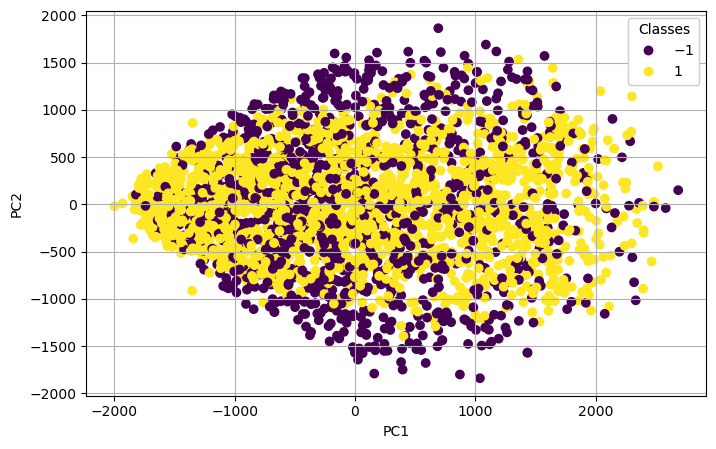

In [44]:
#Plot scatter plot
plt.style.use('default')

i1 = 0 #first principal component
i2 = 1 #second principal component

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

#Plot 1st and 2nd components
scatter = ax.scatter(Xtrain_pca[:,i1],Xtrain_pca[:,i2], c  = Ytrain)

#Show legend
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [45]:
print("Variance  explained by first component: ", pca.explained_variance_ratio_[0] *100,'%')
print("Variance  explained by second component: ", pca.explained_variance_ratio_[1] *100,'%')
print("Variance  loss: ", (1 - (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])) *100,'%')

Variance  explained by first component:  23.66752094073713 %
Variance  explained by second component:  9.745055306197655 %
Variance  loss:  66.58742375306521 %


Only **33.4%** (23.67+9.75) of the training data lies along the first two components, with the subsequent **66.6%** being lost. The reduction of the number of dimensions to 2 resulted in significant information and variance loss.

This can also be visualised by the scatterplot of the reduced two dimension dataset which shows overlapping and hard to seperate +1 and -1 classes.  

## ii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

In [46]:
#Refit a PCA and keep all components to study how much variance can be captured with increasing components
pca = PCA()
pca.fit(Xtrain)
cumsum = np.cumsum(pca.explained_variance_ratio_) #cumulative explained variance 
dim = np.argmax(cumsum >= 0.95) + 1 #no of d dimensions explaining 95% of variance in train set


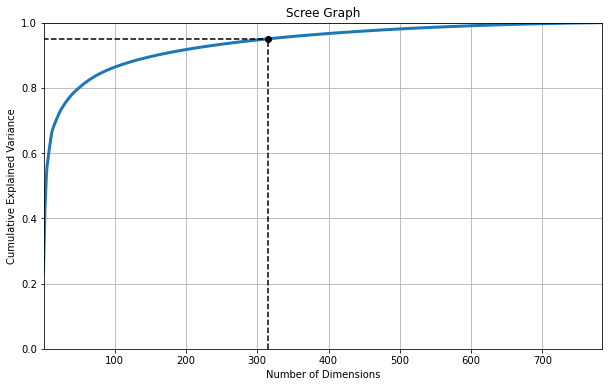

In [47]:
#Plot the scree-graph of cumulative explained varaince and the number of dimensions used
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
#plt.axis([0, 800, 0, 1])
plt.axis([1,len(cumsum),0,1])
plt.plot([dim, dim], [0, 0.95], "k--")
plt.plot([0, dim], [0.95, 0.95], "k--")
plt.plot(dim, 0.95, "ko")
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Graph')
plt.grid()
plt.show()


In [48]:
#Result using cumulative explained variance variable
print("Number of dimensions to explain 95% of variance in training set:", dim)

Number of dimensions to explain 95% of variance in training set: 315


In [49]:
#Verify results using Second Method by refitting a PCA with 0.95 variance explained
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(Xtrain)
print("Number of dimensions to explain 95% of variance in training set:", pca.n_components_)

Number of dimensions to explain 95% of variance in training set: 315


The number of dimensions required to explain 95% of the variance in the training set is **315**. 

## iii. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

From Problem 4 Part ii, it was noted that reducing the number of dimensions to 315 (approximately 18x18 image from 28x28) explains 95% variance and hence only 5% of variance is dropped when reconstructing an image. 

The approach taken to reduce the number of dimensions was to start by reducing the number of dimensions to 324 (18x18 image) and reconstruct an image using an inverse_transform. The results show that the slight image quality loss still left the image almost intact. After computing GridSearchCV on a Kernelized SVM and the AUC-ROC score for the original dataset and reduced dataset was compared and it was seen that an AUC-ROC of 0.929 was still returned (a slight decrease from a 0.932 score on the original dataset). Hence PCA did severly detere the classifier's performance. 

Whilst a good AUC-ROC score is preferred, it is also desirable to be able to reconstruct the images without a considerable image loss. This will ensure that the strategy generalises well on unseen dataset. The number of dimensions was decreased iteratively from 18x18 (324 dimensions - 95% variance) to 3x3 (9 dimensions - 60% variance). Going below 11x11 (121 dimensions - 88% variance), the image reconstruction resulted in a considerable image quality loss and the AUC-ROC started decreasing. 

Hence a **13x13** (**169 dimensions** - **90.4%** variance) PCA no of components was chosen for this problem which although it resulted in a slight image reconstruction quality loss, the images were mostly intact and the proportion of variance (POV) > 0.9 rule of thumb was still respected.

GridSearchCV was run against the following datasets:
- Normalised PCA-reduced dataset (using normalize preprocessing and PCA)
- Standardised PCA-reduced dataset (using StandardScaler preprocessing and PCA)
- Scaled dataset PCA-reduced between 0-1 (using MinMaxScaler preprocessing and PCA)

Normalisation returned the optimal performance on the PCA reduced dataset as described below. GridSearchCV results for Standardised and Scaled datasets are shown in Appendix Secion C. 

(3000, 169)


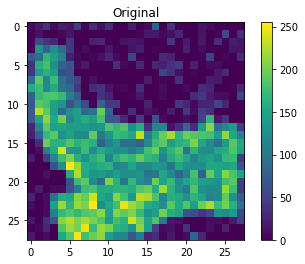

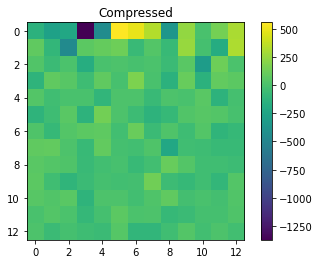

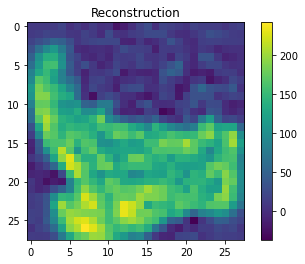

In [50]:
dr = 13 
pca = PCA(n_components=dr*dr)
X_reduced = pca.fit_transform(Xtrain)
print(X_reduced.shape)
X_reconstruction = pca.inverse_transform(X_reduced)

image_no = 50
plt.imshow(Xtrain[image_no,:].reshape(28,28)); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(X_reduced[image_no,:].reshape(dr,dr)); plt.title('Compressed'); plt.colorbar(); plt.show()
plt.imshow(X_reconstruction[image_no,:].reshape(28,28)); plt.title('Reconstruction'); plt.colorbar(); plt.show()

In [51]:
X_train_normalized = preprocessing.normalize(Xtrain, norm='l2')
X_reduced = pca.fit_transform(X_train_normalized)
print(X_reduced.shape)

param_grid = [{'C': [1,2,3,4,5], 'kernel': ['rbf', 'sigmoid','poly'], 'gamma' : [1,5,7,10],'degree':[4]}]

svk_clf = SVC()
grid_search = GridSearchCV(svk_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_reduced, Ytrain)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(3000, 169)
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


Best: 0.928956 using {'C': 4, 'degree': 4, 'gamma': 7, 'kernel': 'rbf'}
0.904530 (0.014066) with: {'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'rbf'}
0.756385 (0.019850) with: {'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'sigmoid'}
0.870343 (0.021513) with: {'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}
0.918663 (0.010255) with: {'C': 1, 'degree': 4, 'gamma': 5, 'kernel': 'rbf'}
0.343663 (0.020830) with: {'C': 1, 'degree': 4, 'gamma': 5, 'kernel': 'sigmoid'}
0.917259 (0.010930) with: {'C': 1, 'degree': 4, 'gamma': 5, 'kernel': 'poly'}
0.919290 (0.011116) with: {'C': 1, 'degree': 4, 'gamma': 7, 'kernel': 'rbf'}
0.362960 (0.009739) with: {'C': 1, 'degree': 4, 'gamma': 7, 'kernel': 'sigmoid'}
0.925046 (0.009844) with: {'C': 1, 'degree': 4, 'gamma': 7, 'kernel': 'poly'}
0.916397 (0.012484) with: {'C': 1, 'degree': 4, 'gamma': 10, 'kernel': 'rbf'}
0.385512 (0.010928) with: {'C': 1, 'degree': 4, 'gamma': 10, 'kernel': 'sigmoid'}
0.922454 (0.012388) with: {'C': 1, 'degree': 4, 'gamma': 10,

In [52]:
#Optimal CV performance of reduced dataset 
# Optimal preprocessing technique normalize()
X_train_normalized = preprocessing.normalize(Xtrain, norm='l2')
X_reduced = pca.fit_transform(X_train_normalized)

print('Reduced dataset shape: ',X_reduced.shape)

svc_kernelised = SVC(kernel = 'rbf', C = 4, gamma = 7)
svck_accuracy_mean, svck_auc_roc_mean, svck_auc_pr_mean, svck_accuracy_std, svck_auc_roc_std, svck_auc_pr_std = evaluation_metrics(X_reduced , Ytrain, svc_kernelised, scoremethod = 'decision_function')


Reduced dataset shape:  (3000, 169)
*******
Accuracy. Mean:  0.869 , Standard Deviation:  0.01
AUC-ROC. Mean:  0.936 , Standard Deviation:  0.008
AUC-PR. Mean:  0.919 , Standard Deviation:  0.01
*******


In [53]:
print('By reducing the number of training set dimensions from ',Xtrain.shape[1],' to ',X_reduced.shape[1])
print('ROC obtained: ',svck_auc_roc_mean,' as compared to 0.932 accuracy achieved using whole training set')

By reducing the number of training set dimensions from  784  to  169
ROC obtained:  0.936  as compared to 0.932 accuracy achieved using whole training set


Hence, it can be concluded that by reducing the dataset to **21.6%** of its original dimension size (from 784 dimensions to 169 dimensions), the AUC-ROC mean score was not reduced and only **9.6%** of the variance was dropped.

**** **End of Question No.4 ** ****

## Question No. 5

By analysing Questions 1 till 4 the following conclusions can be made:
1. The ideal performance metric to use for this dataset is AUC-ROC given that both classes are equally important and that the dataset is slightly imbalanced.
2. Through stratified CV, the mean and standard deviation of each performance metrics can be evaluated by evaluating the performance metrics against folds that contain a representative ratio of each class.
3. The best model for this dataset was identified to be Kernelized SVM with RBF kernel. Hyperparameters were tuned using gridsearchCV and performance metrics evaluated using 5-fold stratified CV.
4. Reducing the number of dimensions to 169 using PCA leads to only a 9.6% variance loss whilst maintaining the same AUC-ROC score for the RBF SVM classifier. GridSearchCV was used to tune the hyperparameters and preprocessing using normalization returned the optimal scores. 

Based on the above observation an optimal pipeline was designed which is divided into **3 stages**. The first stage **preprocesses** the dataset using a **Normalizer**. **PCA** is used to reduce the number of components from 784 to 169 ( 90.4% explained variance). Finally, an **SVC** using the optimal hyperparameters identified in the previous question is used to make predictions. **Evaluation_metrics** function is called again to verify the performance metric scores. 

The prediction score are written to a comma-seperated csv file. (Note the prediction scores are being outputted as u2024991.csv in current working directory. If the predictions label are requested, change 'decision_function' to 'predict' in the code below).

In [7]:
clf_pipeline = Pipeline([
        ("normalizer",  Normalizer(norm='l2')),
        ("pca", PCA(n_components=169)),
        ("svc", SVC(kernel = 'rbf', C = 4, gamma = 7))
    ])

clf_pipeline.fit(Xtrain, Ytrain)

evaluation_model = clf_pipeline

print("Evaluating train set")
#evaluation_metrics(Xtrain , Ytrain, evaluation_model, scoremethod = 'decision_function')

#y_test_labels_pipeline = clf_pipeline.predict(Xtest)
y_test_scores_pipeline = clf_pipeline.decision_function(Xtest)

evaluation_metrics(Xtrain , Ytrain, evaluation_model, scoremethod = 'decision_function')

print('Scores computed')
print('*******')

Evaluating train set
*******
Accuracy. Mean:  0.872 , Standard Deviation:  0.011
AUC-ROC. Mean:  0.937 , Standard Deviation:  0.008
AUC-PR. Mean:  0.922 , Standard Deviation:  0.01
*******
Scores computed
*******


In [9]:
#Save scores to file
np.savetxt('u2024991_Waterloo.csv', y_test_scores_pipeline, delimiter=',', fmt='%f')
print('File Updated with Scores')
print('*******')

File Updated with Scores
*******


**** **End of Question No.5 ** **** <br>
**** **End of Assignment ** ****

# Appendix 

### Section A

Problem 2 No iv - Evaluating the performances metrics against the raw untransformed dataset, the Normalize transformation, and MinMaxScaler transformation. It can be noted that these metrics failed to return better AUC-ROC score than the StandardScaler transformation.

In [56]:
#Raw untransformed training set
n_neighbors = range(1,15,1)

evaluation_metrics_optimalk(Xtrain, Ytrain, n_neighbors)

k-value:  1
Accuracy. Mean:  0.824 , Standard Deviation:  0.012
AUC-ROC. Mean:  0.82 , Standard Deviation:  0.014
AUC-PR. Mean:  0.688 , Standard Deviation:  0.018
*******
k-value:  2
Accuracy. Mean:  0.838 , Standard Deviation:  0.016
AUC-ROC. Mean:  0.875 , Standard Deviation:  0.014
AUC-PR. Mean:  0.783 , Standard Deviation:  0.022
*******
k-value:  3
Accuracy. Mean:  0.834 , Standard Deviation:  0.017
AUC-ROC. Mean:  0.888 , Standard Deviation:  0.015
AUC-PR. Mean:  0.811 , Standard Deviation:  0.021
*******
k-value:  4
Accuracy. Mean:  0.842 , Standard Deviation:  0.012
AUC-ROC. Mean:  0.899 , Standard Deviation:  0.012
AUC-PR. Mean:  0.833 , Standard Deviation:  0.017
*******
k-value:  5
Accuracy. Mean:  0.839 , Standard Deviation:  0.013
AUC-ROC. Mean:  0.904 , Standard Deviation:  0.009
AUC-PR. Mean:  0.841 , Standard Deviation:  0.014
*******
k-value:  6
Accuracy. Mean:  0.844 , Standard Deviation:  0.01
AUC-ROC. Mean:  0.906 , Standard Deviation:  0.008
AUC-PR. Mean:  0.847 ,

In [57]:
#Normalised training set
n_neighbors = range(1,15,1)

X_train_normalized = preprocessing.normalize(Xtrain, norm='l2')
evaluation_metrics_optimalk(X_train_normalized, Ytrain, n_neighbors)

k-value:  1
Accuracy. Mean:  0.849 , Standard Deviation:  0.01
AUC-ROC. Mean:  0.838 , Standard Deviation:  0.012
AUC-PR. Mean:  0.728 , Standard Deviation:  0.015
*******
k-value:  2
Accuracy. Mean:  0.849 , Standard Deviation:  0.009
AUC-ROC. Mean:  0.881 , Standard Deviation:  0.011
AUC-PR. Mean:  0.806 , Standard Deviation:  0.012
*******
k-value:  3
Accuracy. Mean:  0.845 , Standard Deviation:  0.007
AUC-ROC. Mean:  0.896 , Standard Deviation:  0.008
AUC-PR. Mean:  0.833 , Standard Deviation:  0.013
*******
k-value:  4
Accuracy. Mean:  0.847 , Standard Deviation:  0.012
AUC-ROC. Mean:  0.902 , Standard Deviation:  0.007
AUC-PR. Mean:  0.854 , Standard Deviation:  0.008
*******
k-value:  5
Accuracy. Mean:  0.851 , Standard Deviation:  0.008
AUC-ROC. Mean:  0.909 , Standard Deviation:  0.005
AUC-PR. Mean:  0.866 , Standard Deviation:  0.008
*******
k-value:  6
Accuracy. Mean:  0.852 , Standard Deviation:  0.006
AUC-ROC. Mean:  0.907 , Standard Deviation:  0.005
AUC-PR. Mean:  0.867 

In [58]:
#Scaled training set between 0 and 1
n_neighbors = range(1,15,1)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xtrain)

evaluation_metrics_optimalk(X_train_minmax, Ytrain, n_neighbors)

k-value:  1
Accuracy. Mean:  0.824 , Standard Deviation:  0.011
AUC-ROC. Mean:  0.82 , Standard Deviation:  0.014
AUC-PR. Mean:  0.688 , Standard Deviation:  0.016
*******
k-value:  2
Accuracy. Mean:  0.838 , Standard Deviation:  0.019
AUC-ROC. Mean:  0.872 , Standard Deviation:  0.017
AUC-PR. Mean:  0.78 , Standard Deviation:  0.027
*******
k-value:  3
Accuracy. Mean:  0.834 , Standard Deviation:  0.018
AUC-ROC. Mean:  0.889 , Standard Deviation:  0.015
AUC-PR. Mean:  0.811 , Standard Deviation:  0.024
*******
k-value:  4
Accuracy. Mean:  0.841 , Standard Deviation:  0.011
AUC-ROC. Mean:  0.898 , Standard Deviation:  0.012
AUC-PR. Mean:  0.831 , Standard Deviation:  0.019
*******
k-value:  5
Accuracy. Mean:  0.84 , Standard Deviation:  0.012
AUC-ROC. Mean:  0.906 , Standard Deviation:  0.008
AUC-PR. Mean:  0.844 , Standard Deviation:  0.012
*******
k-value:  6
Accuracy. Mean:  0.842 , Standard Deviation:  0.011
AUC-ROC. Mean:  0.905 , Standard Deviation:  0.008
AUC-PR. Mean:  0.846 , 

### Section B
Problem No3 GridSearches using dataset preprocessing techniques which did not return optimal AUC_ROC scores.

### KNN

In [59]:
param_grid = [{'n_neighbors': range(1,15,1)}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(Xtrain, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev: %f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   31.6s finished


Best Score: 0.907538 using {'n_neighbors': 6}
Mean: 0.819791 (StdDev: 0.012512), using Params: {'n_neighbors': 1}
Mean: 0.865698 (StdDev: 0.011504), using Params: {'n_neighbors': 2}
Mean: 0.885241 (StdDev: 0.008139), using Params: {'n_neighbors': 3}
Mean: 0.899068 (StdDev: 0.010366), using Params: {'n_neighbors': 4}
Mean: 0.906748 (StdDev: 0.010108), using Params: {'n_neighbors': 5}
Mean: 0.907538 (StdDev: 0.006705), using Params: {'n_neighbors': 6}
Mean: 0.906708 (StdDev: 0.007467), using Params: {'n_neighbors': 7}
Mean: 0.906448 (StdDev: 0.006911), using Params: {'n_neighbors': 8}
Mean: 0.906555 (StdDev: 0.005833), using Params: {'n_neighbors': 9}
Mean: 0.906001 (StdDev: 0.004432), using Params: {'n_neighbors': 10}
Mean: 0.907204 (StdDev: 0.005473), using Params: {'n_neighbors': 11}
Mean: 0.906935 (StdDev: 0.005341), using Params: {'n_neighbors': 12}
Mean: 0.906736 (StdDev: 0.005404), using Params: {'n_neighbors': 13}
Mean: 0.905702 (StdDev: 0.004728), using Params: {'n_neighbors': 1

In [60]:
param_grid = [{'n_neighbors': range(1,15,1)}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   27.2s finished


Best Score: 0.908175 using {'n_neighbors': 8}
Mean: 0.832836 (StdDev:0.011084), using Params: {'n_neighbors': 1}
Mean: 0.874230 (StdDev:0.018918), using Params: {'n_neighbors': 2}
Mean: 0.890077 (StdDev:0.020275), using Params: {'n_neighbors': 3}
Mean: 0.897911 (StdDev:0.019493), using Params: {'n_neighbors': 4}
Mean: 0.907017 (StdDev:0.016329), using Params: {'n_neighbors': 5}
Mean: 0.907049 (StdDev:0.015152), using Params: {'n_neighbors': 6}
Mean: 0.906093 (StdDev:0.015751), using Params: {'n_neighbors': 7}
Mean: 0.908175 (StdDev:0.015389), using Params: {'n_neighbors': 8}
Mean: 0.904493 (StdDev:0.016767), using Params: {'n_neighbors': 9}
Mean: 0.905633 (StdDev:0.016263), using Params: {'n_neighbors': 10}
Mean: 0.904989 (StdDev:0.014954), using Params: {'n_neighbors': 11}
Mean: 0.904186 (StdDev:0.014888), using Params: {'n_neighbors': 12}
Mean: 0.903161 (StdDev:0.015338), using Params: {'n_neighbors': 13}
Mean: 0.900995 (StdDev:0.015757), using Params: {'n_neighbors': 14}


In [61]:
param_grid = [{'n_neighbors': range(1,15,1)}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   27.0s finished


Best Score: 0.907066 using {'n_neighbors': 11}
Mean: 0.818940 (StdDev:0.012392), using Params: {'n_neighbors': 1}
Mean: 0.864415 (StdDev:0.012566), using Params: {'n_neighbors': 2}
Mean: 0.885137 (StdDev:0.007528), using Params: {'n_neighbors': 3}
Mean: 0.898230 (StdDev:0.009514), using Params: {'n_neighbors': 4}
Mean: 0.906529 (StdDev:0.009664), using Params: {'n_neighbors': 5}
Mean: 0.905954 (StdDev:0.006423), using Params: {'n_neighbors': 6}
Mean: 0.906267 (StdDev:0.006277), using Params: {'n_neighbors': 7}
Mean: 0.906327 (StdDev:0.007088), using Params: {'n_neighbors': 8}
Mean: 0.906092 (StdDev:0.006114), using Params: {'n_neighbors': 9}
Mean: 0.906483 (StdDev:0.005323), using Params: {'n_neighbors': 10}
Mean: 0.907066 (StdDev:0.005798), using Params: {'n_neighbors': 11}
Mean: 0.906047 (StdDev:0.006111), using Params: {'n_neighbors': 12}
Mean: 0.905654 (StdDev:0.006373), using Params: {'n_neighbors': 13}
Mean: 0.905380 (StdDev:0.005782), using Params: {'n_neighbors': 14}


### Perceptron

In [62]:
param_grid = [{'penalty': [None, 'l2', 'l1'], 'alpha': [0.000001,0.000005,0.00001,0.00005, 0.0001], 'fit_intercept': [True, False]}]

perc_clf = Perceptron()
grid_search = GridSearchCV(perc_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(Xtrain, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.2s finished


Best Score: 0.753365 using {'alpha': 1e-05, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.749810 (StdDev:0.018723), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.742522 (StdDev:0.017565), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.749810 (StdDev:0.018723), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.741518 (StdDev:0.012417), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': None}
Mean: 0.748685 (StdDev:0.013193), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l2'}
Mean: 0.741513 (StdDev:0.012418), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l1'}
Mean: 0.749810 (StdDev:0.018723), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.737725 (StdDev:0.019068), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.749810 (StdDev:0.018722), using Params: {'alpha': 5e-06, 'fit_int

In [63]:
param_grid = [{'penalty': [None, 'l2', 'l1'], 'alpha': [0.000001,0.000005,0.00001,0.00005, 0.0001], 'fit_intercept': [True, False]}]

perc_clf = Perceptron()

grid_search = GridSearchCV(perc_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    2.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.8s finished


Best Score: 0.729078 using {'alpha': 0.0001, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.718352 (StdDev:0.014636), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.725999 (StdDev:0.012268), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.717490 (StdDev:0.013675), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.715936 (StdDev:0.016750), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': None}
Mean: 0.722934 (StdDev:0.018578), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l2'}
Mean: 0.720153 (StdDev:0.022064), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l1'}
Mean: 0.718352 (StdDev:0.014636), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.722806 (StdDev:0.021426), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.709654 (StdDev:0.025452), using Params: {'alpha': 5e-06, 'fit_in

In [64]:
param_grid = [{'penalty': [None, 'l2', 'l1'], 'alpha': [0.000001,0.000005,0.00001,0.00005, 0.0001], 'fit_intercept': [True, False]}]

perc_clf = Perceptron()

grid_search = GridSearchCV(perc_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    2.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.4s finished


Best Score: 0.756256 using {'alpha': 1e-05, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.748854 (StdDev:0.009865), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.742698 (StdDev:0.013615), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.739725 (StdDev:0.015097), using Params: {'alpha': 1e-06, 'fit_intercept': True, 'penalty': 'l1'}
Mean: 0.748366 (StdDev:0.008524), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': None}
Mean: 0.745762 (StdDev:0.019338), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l2'}
Mean: 0.739902 (StdDev:0.016350), using Params: {'alpha': 1e-06, 'fit_intercept': False, 'penalty': 'l1'}
Mean: 0.748854 (StdDev:0.009865), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': None}
Mean: 0.749571 (StdDev:0.017010), using Params: {'alpha': 5e-06, 'fit_intercept': True, 'penalty': 'l2'}
Mean: 0.751207 (StdDev:0.016839), using Params: {'alpha': 5e-06, 'fit_int

### MultinomialNB Naïve Bayes Classifier

In [65]:
param_grid = [{'alpha': [0.01, 0.1, 0.5, 1.0, 10,100]}]

nb_clf = MultinomialNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(Xtrain, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


Best Score: 0.651205 using {'alpha': 0.01}
Mean: 0.651205 (StdDev:0.032172), using Params: {'alpha': 0.01}
Mean: 0.651205 (StdDev:0.032172), using Params: {'alpha': 0.1}
Mean: 0.651205 (StdDev:0.032172), using Params: {'alpha': 0.5}
Mean: 0.651205 (StdDev:0.032170), using Params: {'alpha': 1.0}
Mean: 0.651188 (StdDev:0.032168), using Params: {'alpha': 10}
Mean: 0.650727 (StdDev:0.032189), using Params: {'alpha': 100}


In [66]:
param_grid = [{'alpha': [0.000001,0.00001,0.0001,0.001,0.01, 0.1]}]

nb_clf = MultinomialNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


Best Score: 0.661819 using {'alpha': 1e-06}
Mean: 0.661819 (StdDev:0.034394), using Params: {'alpha': 1e-06}
Mean: 0.661819 (StdDev:0.034394), using Params: {'alpha': 1e-05}
Mean: 0.661812 (StdDev:0.034390), using Params: {'alpha': 0.0001}
Mean: 0.661805 (StdDev:0.034378), using Params: {'alpha': 0.001}
Mean: 0.661672 (StdDev:0.034427), using Params: {'alpha': 0.01}
Mean: 0.660965 (StdDev:0.034653), using Params: {'alpha': 0.1}


### GaussianNB Naïve Bayes Classifier

In [67]:

param_grid = [{'var_smoothing': [0.01,0.02,0.05,0.07,0.1,0.5,1]}]

nb_clf = GaussianNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(Xtrain, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Score: 0.734042 using {'var_smoothing': 0.05}
Mean: 0.730530 (StdDev:0.017540), using Params: {'var_smoothing': 0.01}
Mean: 0.732325 (StdDev:0.017537), using Params: {'var_smoothing': 0.02}
Mean: 0.734042 (StdDev:0.018074), using Params: {'var_smoothing': 0.05}
Mean: 0.733683 (StdDev:0.018197), using Params: {'var_smoothing': 0.07}
Mean: 0.731932 (StdDev:0.019758), using Params: {'var_smoothing': 0.1}
Mean: 0.693785 (StdDev:0.035064), using Params: {'var_smoothing': 0.5}
Mean: 0.673931 (StdDev:0.042794), using Params: {'var_smoothing': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.6s finished


In [68]:
param_grid = [{'var_smoothing': [0.001,0.005,0.01,0.05,0.1,0.5,1]}]

nb_clf = GaussianNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score: 0.712976 using {'var_smoothing': 0.01}
Mean: 0.711915 (StdDev:0.016724), using Params: {'var_smoothing': 0.001}
Mean: 0.712627 (StdDev:0.016778), using Params: {'var_smoothing': 0.005}
Mean: 0.712976 (StdDev:0.016647), using Params: {'var_smoothing': 0.01}
Mean: 0.711429 (StdDev:0.015014), using Params: {'var_smoothing': 0.05}
Mean: 0.707108 (StdDev:0.014399), using Params: {'var_smoothing': 0.1}
Mean: 0.699905 (StdDev:0.016353), using Params: {'var_smoothing': 0.5}
Mean: 0.703629 (StdDev:0.017101), using Params: {'var_smoothing': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.6s finished


In [69]:
param_grid = [{'var_smoothing': [0.001,0.005,0.007,0.01,0.02,0.05,0.1,0.5,1]}]

nb_clf = GaussianNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score: 0.729505 using {'var_smoothing': 0.1}
Mean: 0.727876 (StdDev:0.017208), using Params: {'var_smoothing': 0.001}
Mean: 0.727884 (StdDev:0.017333), using Params: {'var_smoothing': 0.005}
Mean: 0.727870 (StdDev:0.017308), using Params: {'var_smoothing': 0.007}
Mean: 0.728161 (StdDev:0.017296), using Params: {'var_smoothing': 0.01}
Mean: 0.728372 (StdDev:0.017401), using Params: {'var_smoothing': 0.02}
Mean: 0.728497 (StdDev:0.017695), using Params: {'var_smoothing': 0.05}
Mean: 0.729505 (StdDev:0.017676), using Params: {'var_smoothing': 0.1}
Mean: 0.729199 (StdDev:0.021478), using Params: {'var_smoothing': 0.5}
Mean: 0.725452 (StdDev:0.025409), using Params: {'var_smoothing': 1}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


### BernoulliNB Naïve Bayes Classifier

In [70]:
param_grid = [{'alpha': [0.001,0.1,1,10,50],'binarize':[0.1,0,0.5,1,2,10]}]

nb_clf = BernoulliNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(Xtrain, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s


Best Score: 0.712599 using {'alpha': 50, 'binarize': 0.1}
Mean: 0.656361 (StdDev:0.023132), using Params: {'alpha': 0.001, 'binarize': 0.1}
Mean: 0.656361 (StdDev:0.023132), using Params: {'alpha': 0.001, 'binarize': 0}
Mean: 0.656361 (StdDev:0.023132), using Params: {'alpha': 0.001, 'binarize': 0.5}
Mean: 0.656032 (StdDev:0.022069), using Params: {'alpha': 0.001, 'binarize': 1}
Mean: 0.656301 (StdDev:0.022211), using Params: {'alpha': 0.001, 'binarize': 2}
Mean: 0.656299 (StdDev:0.020435), using Params: {'alpha': 0.001, 'binarize': 10}
Mean: 0.656452 (StdDev:0.023140), using Params: {'alpha': 0.1, 'binarize': 0.1}
Mean: 0.656452 (StdDev:0.023140), using Params: {'alpha': 0.1, 'binarize': 0}
Mean: 0.656452 (StdDev:0.023140), using Params: {'alpha': 0.1, 'binarize': 0.5}
Mean: 0.656128 (StdDev:0.022061), using Params: {'alpha': 0.1, 'binarize': 1}
Mean: 0.656360 (StdDev:0.022227), using Params: {'alpha': 0.1, 'binarize': 2}
Mean: 0.656356 (StdDev:0.020433), using Params: {'alpha': 0.1, 

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.7s finished


In [71]:
param_grid = [{'alpha': [0.00001,0.0001,0.001,0.1,1,10,40,50,60,70,80,90,100],'binarize':[-1,0.1,0,0.5,1,2,10]}]

nb_clf = BernoulliNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 91 candidates, totalling 455 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 432 out of 455 | elapsed:    4.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 455 out of 455 | elapsed:    4.5s finished


Best Score: 0.717295 using {'alpha': 60, 'binarize': 0}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': -1}
Mean: 0.566407 (StdDev:0.024469), using Params: {'alpha': 1e-05, 'binarize': 0.1}
Mean: 0.656356 (StdDev:0.023134), using Params: {'alpha': 1e-05, 'binarize': 0}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 0.5}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 1}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 2}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 1e-05, 'binarize': 10}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 0.0001, 'binarize': -1}
Mean: 0.567081 (StdDev:0.024246), using Params: {'alpha': 0.0001, 'binarize': 0.1}
Mean: 0.656356 (StdDev:0.023134), using Params: {'alpha': 0.0001, 'binarize': 0}
Mean: 0.500000 (StdDev:0.000000), using Params: {'alpha': 0.0001, 'binarize': 0.5}
Mean: 0.500000 (StdDev:0.000000), using Params: {

In [72]:
param_grid = [{'alpha': [0.00001,0.0001,0.001,0.1,1,10,40,50,60,70,80,90,100,200],'binarize':[-1,0.1,0,0.5,1,2,10]}]

nb_clf = BernoulliNB()
grid_search = GridSearchCV(nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 467 out of 490 | elapsed:    5.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    5.2s finished


Best Score: 0.711563 using {'alpha': 200, 'binarize': -1}
Mean: 0.614813 (StdDev:0.020286), using Params: {'alpha': 1e-05, 'binarize': -1}
Mean: 0.634347 (StdDev:0.015052), using Params: {'alpha': 1e-05, 'binarize': 0.1}
Mean: 0.625273 (StdDev:0.024294), using Params: {'alpha': 1e-05, 'binarize': 0}
Mean: 0.641902 (StdDev:0.060893), using Params: {'alpha': 1e-05, 'binarize': 0.5}
Mean: 0.648290 (StdDev:0.063176), using Params: {'alpha': 1e-05, 'binarize': 1}
Mean: 0.647775 (StdDev:0.017748), using Params: {'alpha': 1e-05, 'binarize': 2}
Mean: 0.506156 (StdDev:0.003246), using Params: {'alpha': 1e-05, 'binarize': 10}
Mean: 0.614813 (StdDev:0.020286), using Params: {'alpha': 0.0001, 'binarize': -1}
Mean: 0.634349 (StdDev:0.015054), using Params: {'alpha': 0.0001, 'binarize': 0.1}
Mean: 0.625273 (StdDev:0.024294), using Params: {'alpha': 0.0001, 'binarize': 0}
Mean: 0.641902 (StdDev:0.060893), using Params: {'alpha': 0.0001, 'binarize': 0.5}
Mean: 0.648292 (StdDev:0.063177), using Params:

### Logistic regression

In [73]:
param_grid = [{'penalty': ['l1', 'l2'], 'tol':[0.05,0.1,0.5,1], 'C':[0.05,0.1,0.5,1] , 'solver': ['lbfgs', 'liblinear', 'sag']}]

lr_clf = LogisticRegression(max_iter = 1000)
grid_search = GridSearchCV(lr_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(Xtrain, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.8min finished


Best Score: 0.782968 using {'C': 0.5, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.05}
Mean: nan (StdDev:nan), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.05}
Mean: nan (StdDev:nan), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.5}
Mean: nan (StdDev:nan), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1}
Mean: 0.767522 (StdDev:0.018038), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.05}
Mean: 0.777813 (StdDev:0.016403), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
Mean: 0.771456 (StdDev:0.014846), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.5}
Mean: 0.763726 (StdDev:0.026603), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
Mean: nan (StdDev:nan), using Params: {'C': 0.05, 'penalty': 'l1', 'solver': 

In [74]:
param_grid = [{'penalty': ['l1', 'l2'], 'tol':[0.1,1,10], 'C':[1,10,12] , 'solver': ['lbfgs', 'liblinear', 'sag']}]

lr_clf = LogisticRegression(max_iter = 1000)
grid_search = GridSearchCV(lr_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 247 out of 270 | elapsed:   12.9s remaining:    1.1s


Best Score: 0.781889 using {'C': 12, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 10}
Mean: 0.759762 (StdDev:0.014061), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
Mean: 0.760799 (StdDev:0.018842), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
Mean: 0.500000 (StdDev:0.000000), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 10}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'sag', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'sag', 'tol': 1}
Mean: nan (StdDev:nan), using Params: {'C': 1, 'penalty': 'l1', 'solver': 'sag', 'tol': 10}
Mean: 0.731483 (StdDev:0.016271), u

[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   14.4s finished


In [75]:
param_grid = [{'penalty': ['l1', 'l2'], 'tol':[0.01,0.1,1,10], 'C':[0.01,0.1,1,10] , 'solver': ['lbfgs', 'liblinear', 'sag']}]

lr_clf = LogisticRegression(max_iter = 1000)
grid_search = GridSearchCV(lr_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 457 out of 480 | elapsed:   19.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   20.7s finished


Best Score: 0.782853 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.01}
Mean: nan (StdDev:nan), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1}
Mean: nan (StdDev:nan), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 1}
Mean: nan (StdDev:nan), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 10}
Mean: 0.500000 (StdDev:0.000000), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Mean: 0.510819 (StdDev:0.014419), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}
Mean: 0.511563 (StdDev:0.021496), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1}
Mean: 0.500000 (StdDev:0.000000), using Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 10}
Mean: nan (StdDev:nan), using Params: {'C': 0.01, 'penalty': 'l1', 'solver

### Linear SVM

In [76]:
param_grid = [{'C': [0.0001,0.0005,0.001,0.005,0.01]}]

sv_clf = SVC(kernel = 'linear')
grid_search = GridSearchCV(sv_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:   23.7s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.8s finished


Best Score: 0.782998 using {'C': 0.001}
Mean: 0.757766 (StdDev:0.025939), using Params: {'C': 0.0001}
Mean: 0.778420 (StdDev:0.016829), using Params: {'C': 0.0005}
Mean: 0.782998 (StdDev:0.014898), using Params: {'C': 0.001}
Mean: 0.779323 (StdDev:0.010271), using Params: {'C': 0.005}
Mean: 0.770139 (StdDev:0.006692), using Params: {'C': 0.01}


In [77]:
param_grid = [{'C': [0.01,0.05,0.1,0.5,1]}]

sv_clf = SVC(kernel = 'linear')
grid_search = GridSearchCV(sv_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_minmax, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:   22.4s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.4s finished


Best Score: 0.776571 using {'C': 0.05}
Mean: 0.764837 (StdDev:0.018967), using Params: {'C': 0.01}
Mean: 0.776571 (StdDev:0.014068), using Params: {'C': 0.05}
Mean: 0.773191 (StdDev:0.011262), using Params: {'C': 0.1}
Mean: 0.746434 (StdDev:0.009652), using Params: {'C': 0.5}
Mean: 0.736872 (StdDev:0.011880), using Params: {'C': 1}


### Kernelized SVM

In [78]:
param_grid = [{'C': [1,2,3,4,5], 'kernel': ['rbf', 'sigmoid','poly'], 'gamma' : [3,4,5,6,10],'degree':[7]}]

svk_clf = SVC()
grid_search = GridSearchCV(svk_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_normalized, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  7.1min finished


Best Score: 0.927457 using {'C': 3, 'degree': 7, 'gamma': 5, 'kernel': 'rbf'}
Mean: 0.913791 (StdDev:0.012639), using Params: {'C': 1, 'degree': 7, 'gamma': 3, 'kernel': 'rbf'}
Mean: 0.415082 (StdDev:0.027021), using Params: {'C': 1, 'degree': 7, 'gamma': 3, 'kernel': 'sigmoid'}
Mean: 0.915735 (StdDev:0.015497), using Params: {'C': 1, 'degree': 7, 'gamma': 3, 'kernel': 'poly'}
Mean: 0.915437 (StdDev:0.012314), using Params: {'C': 1, 'degree': 7, 'gamma': 4, 'kernel': 'rbf'}
Mean: 0.380325 (StdDev:0.020214), using Params: {'C': 1, 'degree': 7, 'gamma': 4, 'kernel': 'sigmoid'}
Mean: 0.915724 (StdDev:0.015491), using Params: {'C': 1, 'degree': 7, 'gamma': 4, 'kernel': 'poly'}
Mean: 0.915600 (StdDev:0.012374), using Params: {'C': 1, 'degree': 7, 'gamma': 5, 'kernel': 'rbf'}
Mean: 0.391271 (StdDev:0.019969), using Params: {'C': 1, 'degree': 7, 'gamma': 5, 'kernel': 'sigmoid'}
Mean: 0.915731 (StdDev:0.015481), using Params: {'C': 1, 'degree': 7, 'gamma': 5, 'kernel': 'poly'}
Mean: 0.914227 (

In [79]:
param_grid = [{'C': [1,2,3,5], 'kernel': ['rbf', 'sigmoid','poly'], 'gamma' : [0.0001,0.0005,0.001,0.005,0.01],'degree':[2]}]

svk_clf = SVC()
grid_search = GridSearchCV(svk_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_train_scaled, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


Best Score: 0.921178 using {'C': 3, 'degree': 2, 'gamma': 0.005, 'kernel': 'rbf'}
Mean: 0.815878 (StdDev:0.021757), using Params: {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean: 0.757561 (StdDev:0.025954), using Params: {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'sigmoid'}
Mean: 0.847831 (StdDev:0.023670), using Params: {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Mean: 0.893820 (StdDev:0.010205), using Params: {'C': 1, 'degree': 2, 'gamma': 0.0005, 'kernel': 'rbf'}
Mean: 0.768692 (StdDev:0.018266), using Params: {'C': 1, 'degree': 2, 'gamma': 0.0005, 'kernel': 'sigmoid'}
Mean: 0.868885 (StdDev:0.017667), using Params: {'C': 1, 'degree': 2, 'gamma': 0.0005, 'kernel': 'poly'}
Mean: 0.911315 (StdDev:0.009310), using Params: {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Mean: 0.700698 (StdDev:0.019986), using Params: {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'sigmoid'}
Mean: 0.893284 (StdDev:0.011108), using Params: {'C': 1, 'degree': 2, 'gam

### Section C
### Problem No4 GridSearches using dataset preprocessing techniques which did not return optimal AUC_ROC scores

In [80]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xtrain)
X_reduced = pca.fit_transform(X_train_minmax)
print(X_reduced.shape)

param_grid = [{'C': [1,2,3,4,5,8], 'kernel': ['rbf', 'sigmoid','poly'], 'gamma' : [0.005,0.01,0.05,0.1,0.5,1],'degree':[2]}]

svk_clf = SVC()
grid_search = GridSearchCV(svk_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_reduced, Ytrain)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

(3000, 169)
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.7min finished


Best: 0.925341 using {'C': 3, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Mean: 0.886479 (StdDev:0.011952), using Params: {'C': 1, 'degree': 2, 'gamma': 0.005, 'kernel': 'rbf'}
Mean: 0.735740 (StdDev:0.021254), using Params: {'C': 1, 'degree': 2, 'gamma': 0.005, 'kernel': 'sigmoid'}
Mean: 0.860319 (StdDev:0.018697), using Params: {'C': 1, 'degree': 2, 'gamma': 0.005, 'kernel': 'poly'}
Mean: 0.907862 (StdDev:0.008696), using Params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Mean: 0.657448 (StdDev:0.021016), using Params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
Mean: 0.885622 (StdDev:0.011887), using Params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Mean: 0.920193 (StdDev:0.009043), using Params: {'C': 1, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Mean: 0.486945 (StdDev:0.015953), using Params: {'C': 1, 'degree': 2, 'gamma': 0.05, 'kernel': 'sigmoid'}
Mean: 0.904788 (StdDev:0.007090), using Params: {'C': 1, 'degree': 2, 'gamma': 0.05, 'kernel

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_reduced = pca.fit_transform(X_train_scaled)
print(X_reduced.shape)

param_grid = [{'C': [1,2,3,4,5], 'kernel': ['rbf', 'sigmoid','poly'], 'gamma' : [0.001,0.005,0.01,0.1,0.5,1],'degree':[4]}]

svk_clf = SVC()
grid_search = GridSearchCV(svk_clf, param_grid, cv=5, verbose=2, n_jobs=-1, scoring ="roc_auc")
grid_search.fit(X_reduced, Ytrain)

print("Best Score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f (StdDev:%f), using Params: %r" % (mean, stdev, param))

(3000, 169)
Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.7min finished


Best Score: 0.925327 using {'C': 2, 'degree': 4, 'gamma': 0.005, 'kernel': 'rbf'}
Mean: 0.908457 (StdDev:0.008514), using Params: {'C': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'rbf'}
Mean: 0.692826 (StdDev:0.022833), using Params: {'C': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'sigmoid'}
Mean: 0.871384 (StdDev:0.018505), using Params: {'C': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'poly'}
Mean: 0.920972 (StdDev:0.006686), using Params: {'C': 1, 'degree': 4, 'gamma': 0.005, 'kernel': 'rbf'}
Mean: 0.490487 (StdDev:0.015437), using Params: {'C': 1, 'degree': 4, 'gamma': 0.005, 'kernel': 'sigmoid'}
Mean: 0.903716 (StdDev:0.014749), using Params: {'C': 1, 'degree': 4, 'gamma': 0.005, 'kernel': 'poly'}
Mean: 0.905857 (StdDev:0.003733), using Params: {'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel': 'rbf'}
Mean: 0.489517 (StdDev:0.018090), using Params: {'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel': 'sigmoid'}
Mean: 0.902919 (StdDev:0.014298), using Params: {'C': 1, 'degree': 4, 'gamma': 0.0